# Data Analysis

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math

In [2]:
data = pd.read_csv('../data_prep/hot_plus_random.csv')

In [3]:
data.head()

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.565   0.547   0.0    -7.722   1.0       0.0347        0.5790   
1         0.578   0.894  10.0    -5.420   1.0       0.0296        0.0103   
2         0.529   0.496   7.0    -9.007   1.0       0.0290        0.1730   
3         0.488   0.923   2.0    -3.697   1.0       0.1030        0.1290   
4         0.753   0.450   9.0    -6.909   1.0       0.0924        0.2740   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000     0.194    0.252   75.018  audio_features   
1          0.000003     0.216    0.741  165.980  audio_features   
2          0.000000     0.251    0.278  136.859  audio_features   
3          0.000000     0.158    0.818  183.891  audio_features   
4          0.000002     0.321    0.560  109.405  audio_features   

                       id                                   uri  \
0  1MOqMyQ7CULmWWjovkFY5B  spotify:track:1MOqMyQ7CULmWWjovkFY5B   
1  2dwhMQsFeHr2S787WxqAqW  spotify:track:2dwhMQsFeHr2S787WxqAqW   
2  3y4LxiYMgDl4RethdzpmNe  spotify:track:3y4LxiYMgDl4RethdzpmNe   
3  296XGtH5MeGisqD3uAz6Q6  spotify:track:296XGtH5MeGisqD3uAz6Q6   
4  6kD36kVRn5leDDbjXpHQY0  spotify:track:6kD36kVRn5leDDbjXpHQY0   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1MOqMyQ7CULm...   
1  https://api.spotify.com/v1/tracks/2dwhMQsFeHr2...   
2  https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...   
3  https://api.spotify.com/v1/tracks/296XGtH5MeGi...   
4  https://api.spotify.com/v1/tracks/6kD36kVRn5le...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1MOq...     209320.0   
1  https://api.spotify.com/v1/audio-analysis/2dwh...     347107.0   
2  https://api.spotify.com/v1/audio-analysis/3y4L...     250547.0   
3  https://api.spotify.com/v1/audio-analysis/296X...     202253.0   
4  https://api.spotify.com/v1/audio-analysis/6kD3...     288933.0   

   time_signature  success  
0             4.0      1.0  
1             4.0      1.0  
2             4.0      1.0  
3             4.0      1.0  
4             4.0      1.0

In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'success'],
      dtype='object')


In [5]:
# y includes our labels (Y or N) and x includes our features
y = data.success
# drop text columns
list = ['type','id','uri', 'track_href', 'analysis_url', 'success']
x = data.drop(list,axis = 1 )
x.head()

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.565   0.547   0.0    -7.722   1.0       0.0347        0.5790   
1         0.578   0.894  10.0    -5.420   1.0       0.0296        0.0103   
2         0.529   0.496   7.0    -9.007   1.0       0.0290        0.1730   
3         0.488   0.923   2.0    -3.697   1.0       0.1030        0.1290   
4         0.753   0.450   9.0    -6.909   1.0       0.0924        0.2740   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000000     0.194    0.252   75.018     209320.0             4.0  
1          0.000003     0.216    0.741  165.980     347107.0             4.0  
2          0.000000     0.251    0.278  136.859     250547.0             4.0  
3          0.000000     0.158    0.818  183.891     202253.0             4.0  
4          0.000002     0.321    0.560  109.405     288933.0             4.0

Number of succesful songs:  7857
Number of not succesful songs :  7857


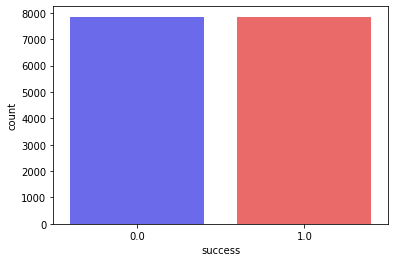

In [6]:
ax = sns.countplot(y, label="Count", palette='seismic')       # Y = 7857, N = 7857
Y, N = y.value_counts()
print('Number of succesful songs: ', Y)
print('Number of not succesful songs : ', N)

In [7]:
x.describe()

danceability        energy          key      loudness          mode  \
count  15714.000000  15714.000000  15714.00000  15714.000000  15714.000000   
mean       0.599414      0.552151      5.23635    -10.371038      0.664948   
std        0.175795      0.261042      3.56016      6.866812      0.472024   
min        0.000000      0.000000      0.00000    -47.395000      0.000000   
25%        0.501000      0.329000      2.00000    -14.563500      0.000000   
50%        0.632000      0.590000      5.00000     -7.626000      1.000000   
75%        0.717000      0.772000      8.00000     -5.294000      1.000000   
max        0.986000      1.000000     11.00000      0.175000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  15714.000000  15714.000000      15714.000000  15714.000000   
mean       0.261971      0.344270          0.112481      0.225027   
std        0.341849      0.331036          0.281398      0.190886   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.039000      0.040200          0.000000      0.103000   
50%        0.068600      0.231000          0.000000      0.147000   
75%        0.317000      0.615000          0.000381      0.293000   
max        0.971000      0.996000          1.000000      1.000000   

            valence         tempo   duration_ms  time_signature  
count  15714.000000  15714.000000  1.571400e+04    15714.000000  
mean       0.483976    117.232379  2.176059e+05        3.822197  
std        0.242454     31.655250  1.332975e+05        0.689274  
min        0.000000      0.000000  5.253000e+03        0.000000  
25%        0.299000     93.536250  1.625560e+05        4.000000  
50%        0.484000    116.465000  2.110000e+05        4.000000  
75%        0.669000    137.138250  2.497578e+05        4.000000  
max        1.000000    247.994000  4.354000e+06        5.000000

### Visualization

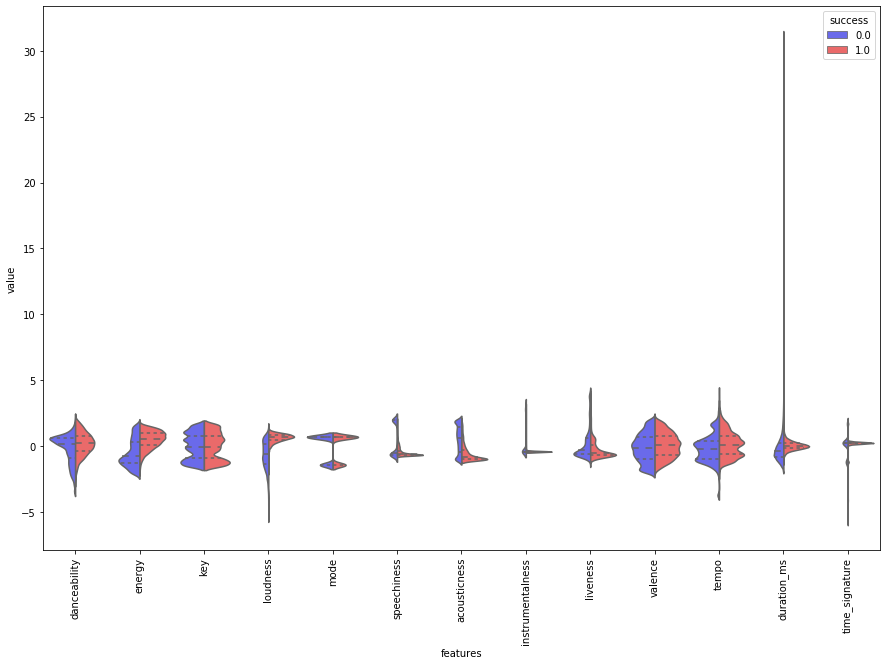

In [8]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization and unpivot to long format
data = pd.concat([y,data_n_2.iloc[:,0:13]],axis=1)
data = pd.melt(data,id_vars="success",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="features", y="value", hue="success", data=data,split=True, inner="quart", palette='seismic')
plt.xticks(rotation=90);

[(-4, 4)]

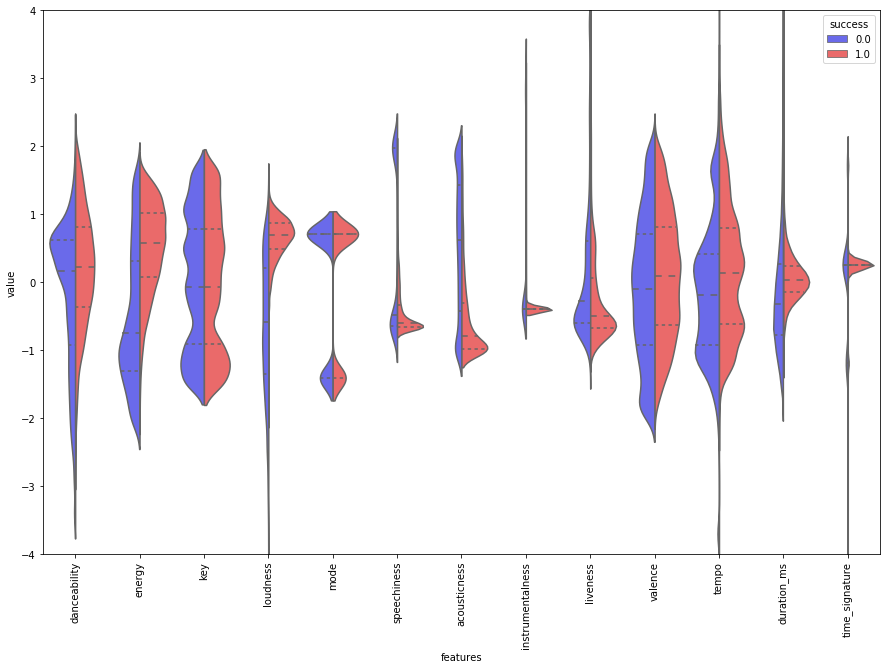

In [9]:
# Zooming to get a better view

plt.figure(figsize=(15,10))
ax = sns.violinplot(x="features", y="value", hue="success", data=data,split=True, inner="quart", palette='seismic')
plt.xticks(rotation=90);

# Set the `xlim`
ax.set(ylim=(-4, 4))

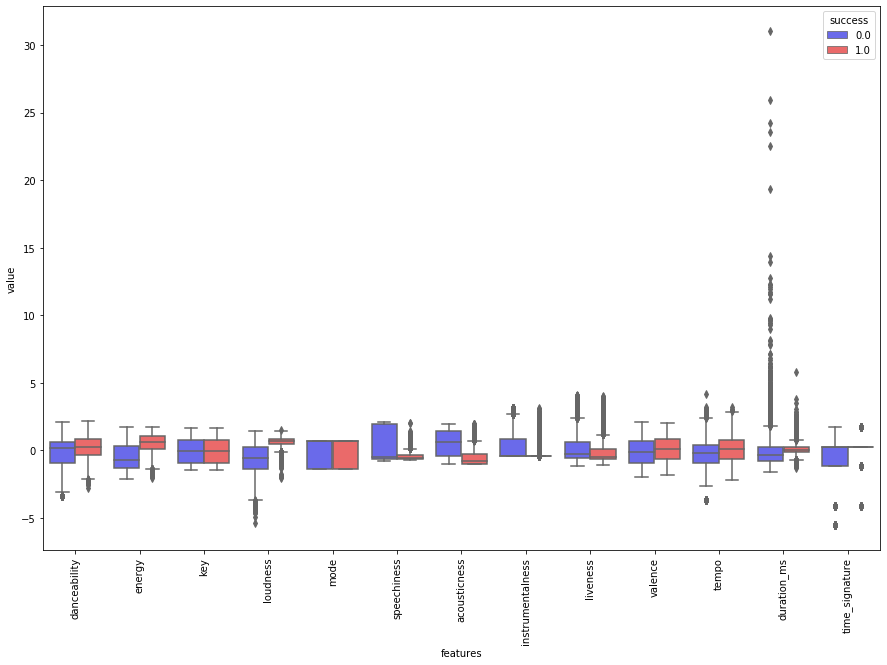

In [10]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="features", y="value", hue="success", data=data, palette='seismic')
plt.xticks(rotation=90);

[(-5, 5)]

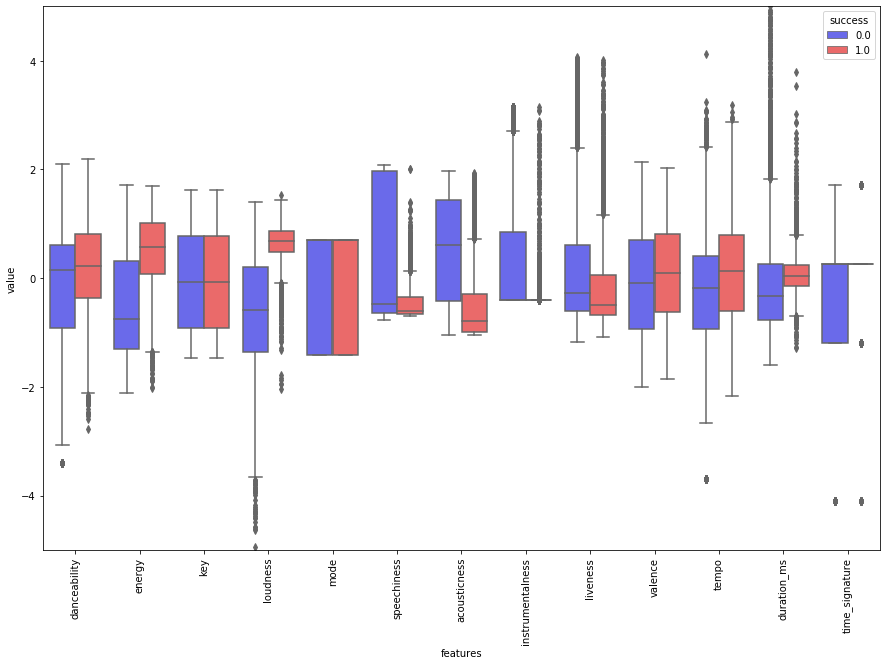

In [11]:
# Changing `y limit` to get a better view

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="features", y="value", hue="success", data=data, palette='seismic')
plt.xticks(rotation=90);
ax.set(ylim=(-5,5))

### Univariate Analysis: Numerical Variable


In [49]:
# putting dataframe back to wide format
df_numeric = x.loc[:,['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
              'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_numeric['success'] = y

In [50]:
df_numeric

danceability  energy  loudness  speechiness  acousticness  \
0             0.565  0.5470    -7.722       0.0347      0.579000   
1             0.578  0.8940    -5.420       0.0296      0.010300   
2             0.529  0.4960    -9.007       0.0290      0.173000   
3             0.488  0.9230    -3.697       0.1030      0.129000   
4             0.753  0.4500    -6.909       0.0924      0.274000   
...             ...     ...       ...          ...           ...   
15709         0.718  0.1390   -20.712       0.9490      0.947000   
15710         0.631  0.2360   -22.540       0.9390      0.676000   
15711         0.384  0.0821   -27.902       0.0499      0.995000   
15712         0.769  0.8600    -4.854       0.0349      0.000363   
15713         0.749  0.8000    -6.412       0.0367      0.004690   

       instrumentalness  liveness  valence    tempo  duration_ms  success  
0              0.000000    0.1940    0.252   75.018     209320.0      1.0  
1              0.000003    0.2160    0.741  165.980     347107.0      1.0  
2              0.000000    0.2510    0.278  136.859     250547.0      1.0  
3              0.000000    0.1580    0.818  183.891     202253.0      1.0  
4              0.000002    0.3210    0.560  109.405     288933.0      1.0  
...                 ...       ...      ...      ...          ...      ...  
15709          0.000000    0.2040    0.598  120.855     299572.0      0.0  
15710          0.000000    0.2210    0.636  169.984     122100.0      0.0  
15711          0.920000    0.1070    0.612  149.326      92507.0      0.0  
15712          0.000004    0.0385    0.971  120.428     241773.0      0.0  
15713          0.247000    0.2070    0.406  117.003     192817.0      0.0  

[15714 rows x 11 columns]

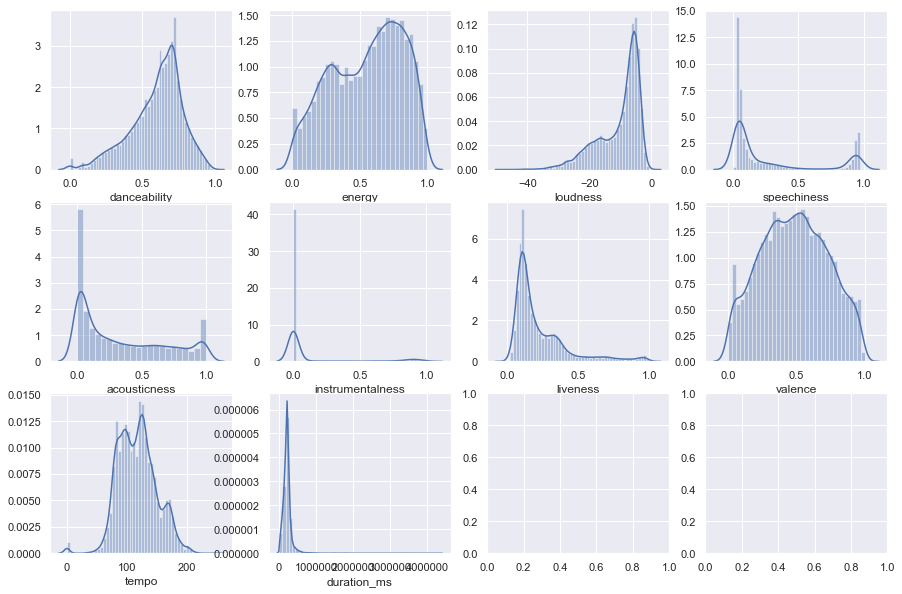

In [85]:
# this plots multiple seaborn histograms on different subplots.
# 
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])

sns.set(rc={'figure.figsize':(15,10)})            
plot_multiple_histograms(df_numeric, ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                                      'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'])

### Univariate Analysis: Categorical Variables

In [51]:
df_categorical = x.loc[:,['key', 'mode', 'time_signature']]
df_categorical['success'] = y

In [52]:
df_categorical

key  mode  time_signature  success
0       0.0   1.0             4.0      1.0
1      10.0   1.0             4.0      1.0
2       7.0   1.0             4.0      1.0
3       2.0   1.0             4.0      1.0
4       9.0   1.0             4.0      1.0
...     ...   ...             ...      ...
15709  11.0   0.0             4.0      0.0
15710   4.0   1.0             4.0      0.0
15711   6.0   1.0             4.0      0.0
15712   7.0   1.0             4.0      0.0
15713   2.0   1.0             4.0      0.0

[15714 rows x 4 columns]

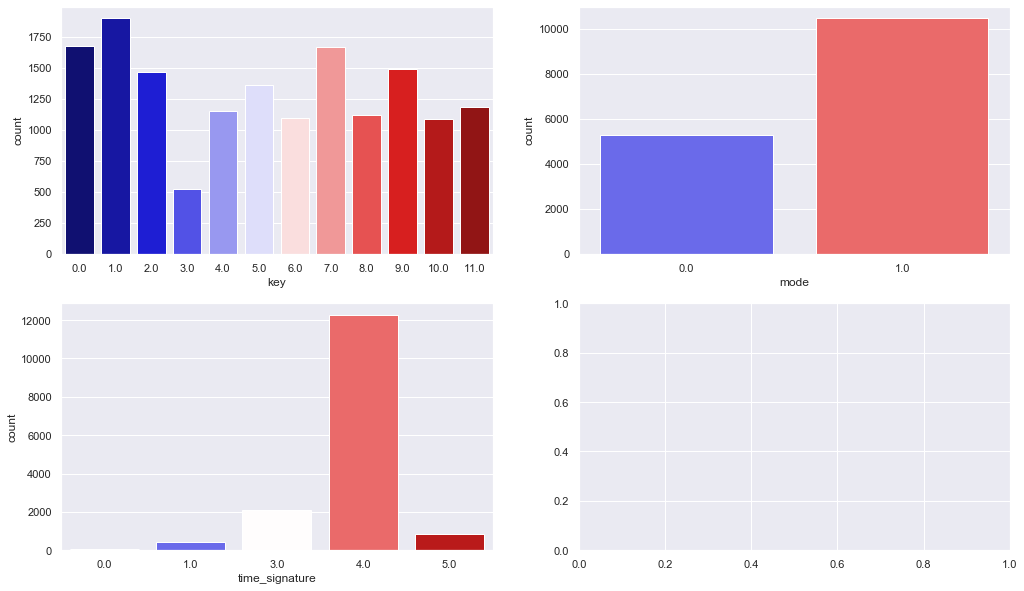

In [86]:
# this plots multiple seaborn count plots on different subplots.
# 
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(df[col], ax=axs)
            else:
                sns.countplot(df[col], ax=axs[j])
        else:
            sns.countplot(df[col], ax=axs[i, j], palette='seismic')

sns.set(rc={'figure.figsize':(17,10)})            
plot_multiple_histograms(df_categorical, ['key', 'mode', 'time_signature'])

# Multivariate Analysis

### Scatter Plot: Two Numerical Variables

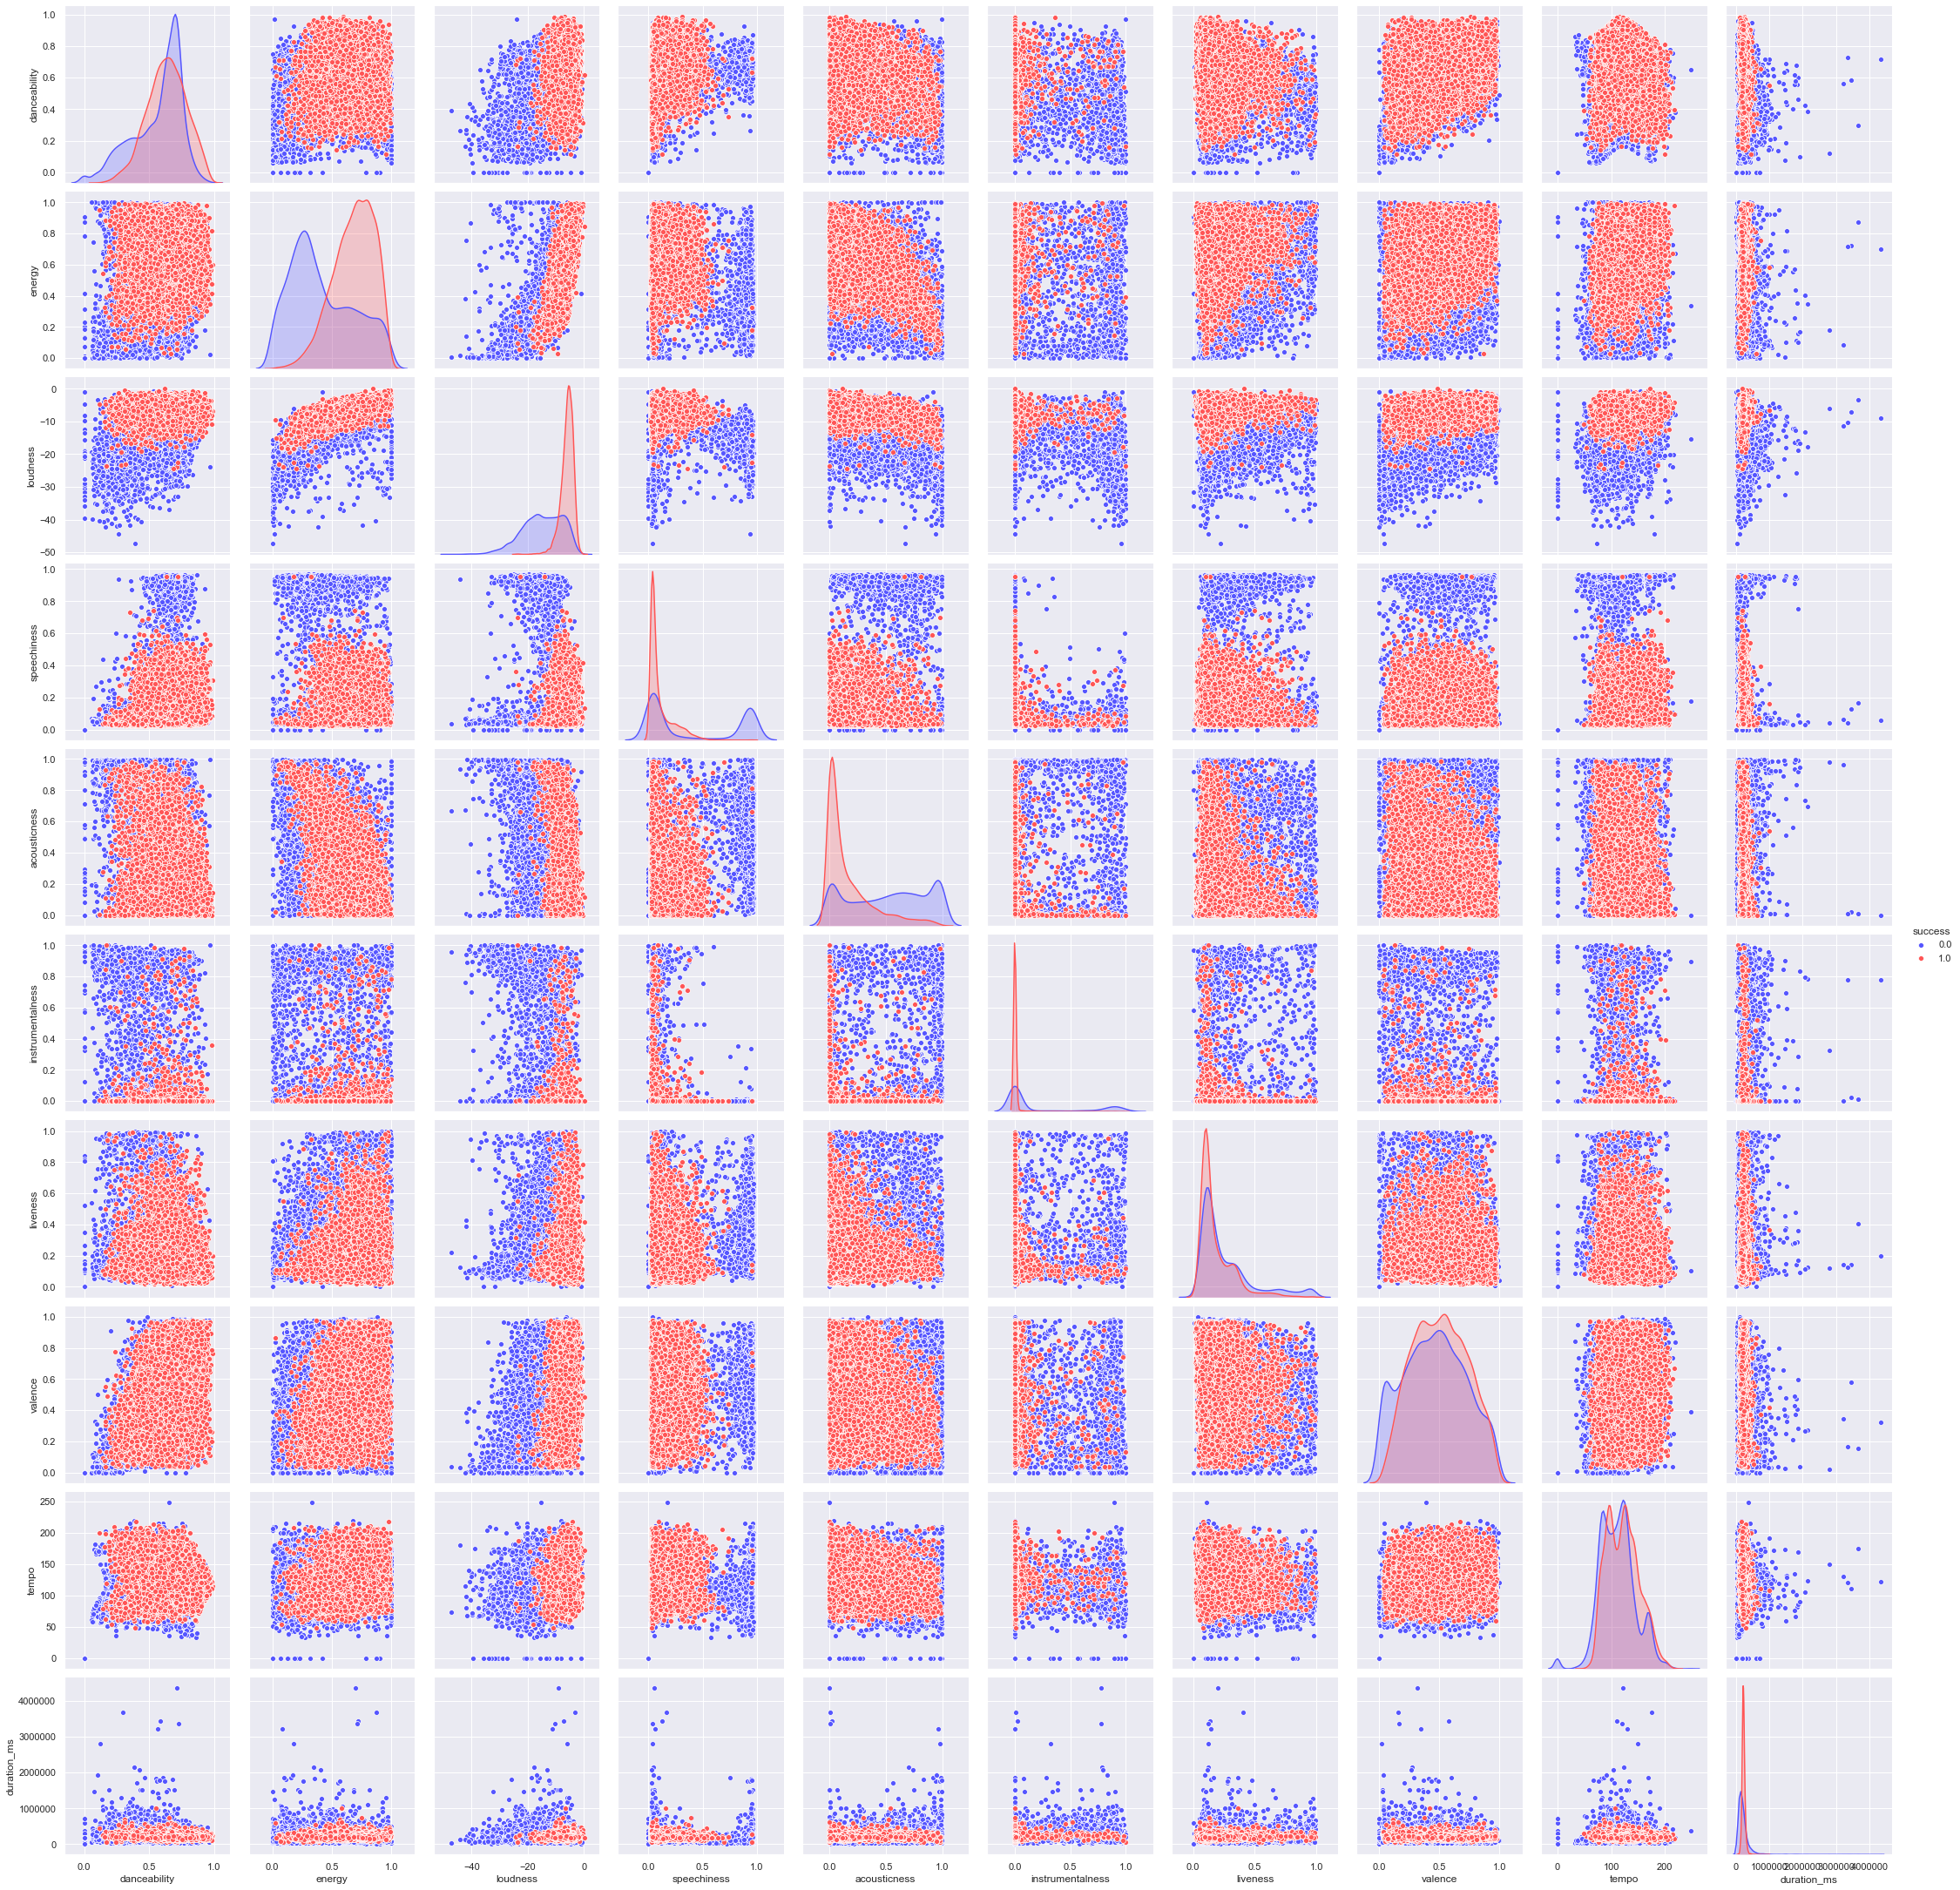

In [56]:
sns.pairplot(df_numeric, height=3, hue='success', palette='seismic');

### Scatter Plot: Two Categorical Variables

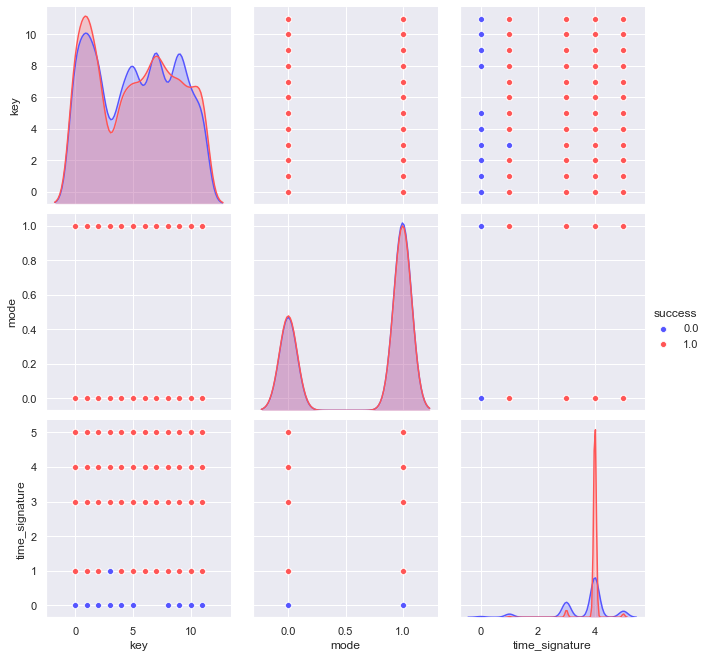

In [81]:
sns.pairplot(df_categorical, height=3, hue='success', palette='seismic');

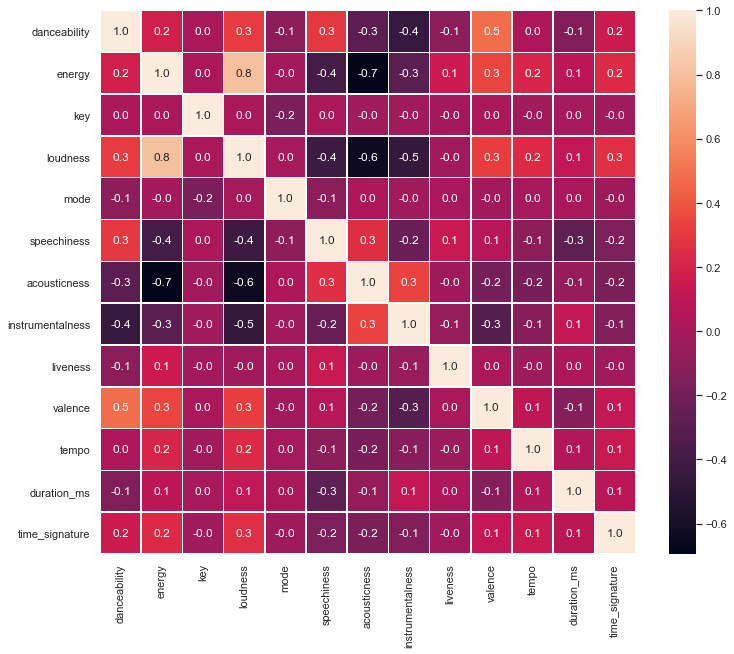

In [96]:
#correlation map
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax);

# Feature Selection and Random Forest Classification

### 1) Feature Selection and Random Forest Classification

Accuracy is:  0.905408271474019


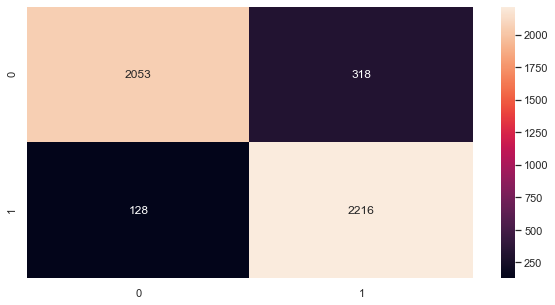

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.set(rc={'figure.figsize':(10,5)}) 
sns.heatmap(cm,annot=True,fmt="d");

Accuracy is:  0.905408271474019

### 2) Univariate feature selection and random forest classification

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# find best scored 5 features
select_feature = SelectKBest(f_classif, k=5).fit(x_train, y_train)

In [61]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [5.12862166e+02 3.75086581e+03 4.44266190e-01 7.72615804e+03
 5.91232305e-01 2.62477952e+03 4.16798468e+03 1.72665671e+03
 5.37710384e+02 1.04747098e+02 2.88771600e+02 7.84050935e+01
 5.14723854e+02]
Feature list: Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


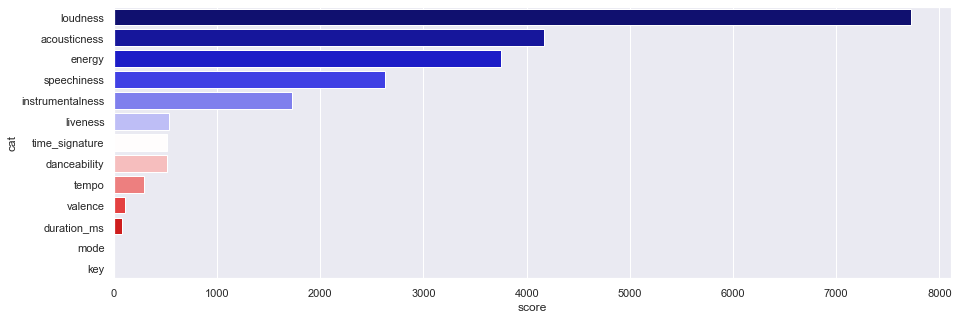

In [89]:
scores = pd.concat([pd.DataFrame(data=x_train.columns),pd.DataFrame(data=select_feature.scores_[:])],axis=1)
scores.columns = ['cat','score']
scores = scores.sort_values('score',ascending=False)

sns.set(rc={'figure.figsize':(15,5)}) 
sns.barplot(x='score',y='cat',data=scores, palette='seismic')
plt.show()

### 3) Recursive feature elimination (RFE) with random forest

In [19]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [20]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms'], dtype='object')


Accuracy is:  0.8839872746553552


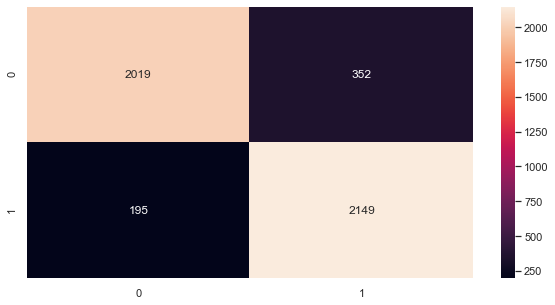

In [100]:
x_train_3 = x_train[['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms']]
x_test_3 = x_test[['energy', 'loudness', 'speechiness', 'acousticness', 'duration_ms']]
#random forest classifier with n_estimators=10 (default)
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(x_train_3,y_train)
ac_3 = accuracy_score(y_test,clf_rf_3.predict(x_test_3))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(y_test,clf_rf_3.predict(x_test_3))
sns.set(rc={'figure.figsize':(10,5)}) 
sns.heatmap(cm_3,annot=True,fmt="d");

Accuracy drops to 0.882 with only those 5 selected features.

### 4) Recursive feature elimination with cross validation and random forest classification

Now we will not only find best features but we also find how many features do we need for best accuracy.

In [22]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


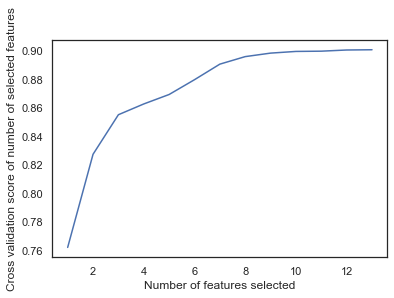

In [23]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make feature selection and understanding data. Then last make our last feature selection method.

### 5) Tree based feature selection and random forest classification

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a **featureimportances** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**

Feature ranking:
1. feature 3 (0.258890)
2. feature 6 (0.112272)
3. feature 5 (0.108514)
4. feature 1 (0.106797)
5. feature 11 (0.093150)
6. feature 7 (0.089837)
7. feature 8 (0.068460)
8. feature 9 (0.052162)
9. feature 0 (0.044985)
10. feature 10 (0.032016)
11. feature 2 (0.017058)
12. feature 12 (0.010989)
13. feature 4 (0.004870)


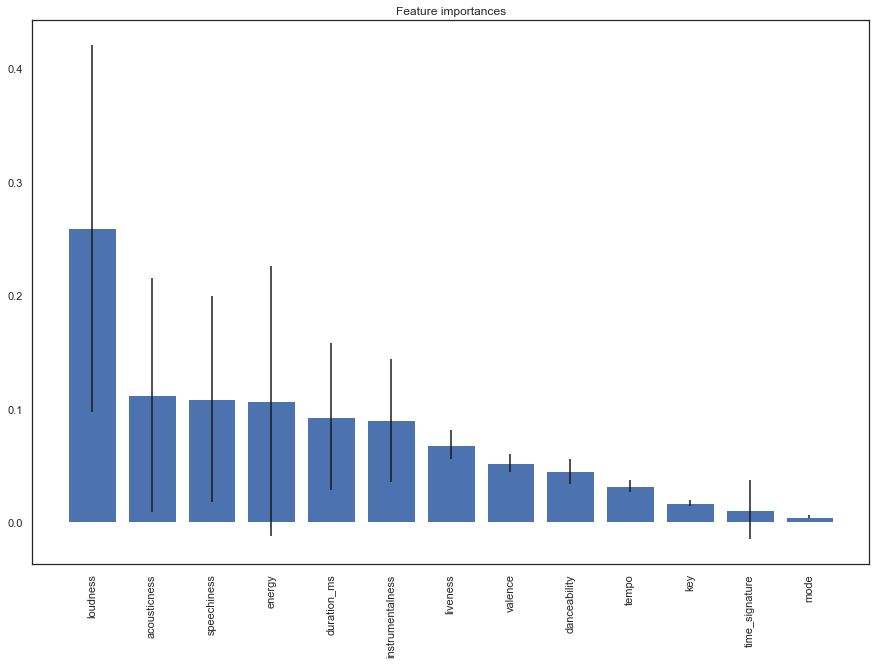

In [24]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show();

### Feature Extraction

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

Text(0, 0.5, 'explained_variance_ratio_')

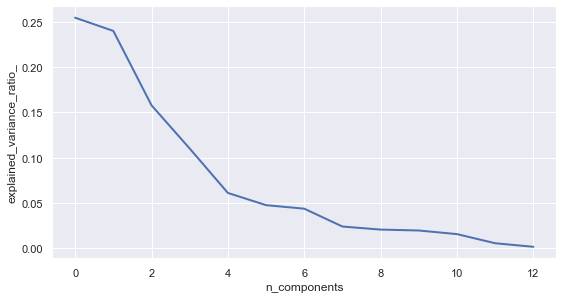

In [104]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

According to variance ration, 4 components can be chosen. (Maybe 1? or 6?)